# Table of Contents --> TBU

1. [Merging datasets](#1-bullet) <br>
    I - [Customers and orders](#2-bullet) <br>
    II - [Data and order_items](#3-bullet) <br>
    III - [Data and order_reviews](#4-bullet) <br>
    IV - [Data and order_payments](#5-bullet) <br>
    V - [Translation of products categories](#6-bullet) <br>
    VI - [Data and products](#7-bullet) <br>
    VII - [Data and sellers](#8-bullet) <br>
    <br>
    
2. [Cleaning](#9-bullet) <br>
    I - [Types](#10-bullet) <br>
    II - [Outliers](#11-bullet) <br>
    III - [Missing values](#12-bullet) <br>
    <br>

3. [Transformation of dataframe](#13-bullet) <br>
    I - [xx](#xx-bullet) <br>
    II - [xx](#xx-bullet) <br>
    III - [xx](#xx-bullet) <br>
    <br>
    
4. [xx](#xx-bullet) <br>
    I - [xx](#xx-bullet) <br>
    II - [xx](#xx-bullet) <br>
    III - [xx](#xx-bullet) <br>
    <br>

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from functions import *

In [157]:
# Loading datas

customers = pd.read_csv('olist_customers_dataset.csv', sep=',')
geolocation = pd.read_csv('olist_geolocation_dataset.csv', sep=',')
order_items = pd.read_csv('olist_order_items_dataset.csv', sep=',')
order_payments = pd.read_csv('olist_order_payments_dataset.csv', sep=',')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv', sep=',')
orders = pd.read_csv('olist_orders_dataset.csv', sep=',')
products = pd.read_csv('olist_products_dataset.csv', sep=',')
sellers = pd.read_csv('olist_sellers_dataset.csv', sep=',')
product_category_name_translation = pd.read_csv('product_category_name_translation.csv', sep=',')

In [158]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_row', 50)

# 1. Merging datasets <a class="anchor" id="1-bullet"></a>

We will try to extract all relevant information on customers on one unique dataset

## I - Customers and orders <a class="anchor" id="2-bullet"></a>

In [159]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [160]:
customers.shape

(99441, 5)

In [298]:
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
customer_geolocation_lat    14837
customer_geolocation_lng    14837
dtype: int64

### a. Adding latitude and longitude with geolocation

In [161]:
geolocation.shape

(1000163, 5)

In [162]:
len(geolocation['geolocation_zip_code_prefix'].unique())

19015

In [163]:
geolocation[geolocation.duplicated(subset='geolocation_zip_code_prefix')]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
2,1046,-23.546129,-46.642951,sao paulo,SP
10,1013,-23.547325,-46.634184,sao paulo,SP
13,1012,-23.548946,-46.634671,sao paulo,SP
14,1037,-23.545187,-46.637855,são paulo,SP
15,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [164]:
# We have several rows for each zip code with more or less the same coordinates, 
# we will create a simplified df with only one row per zip code with the mean value

simplified_geolocation = pd.DataFrame()

simplified_geolocation['geolocation_lat'] = geolocation.groupby(by='geolocation_zip_code_prefix')['geolocation_lat'].mean()
simplified_geolocation['geolocation_lng'] = geolocation.groupby(by='geolocation_zip_code_prefix')['geolocation_lng'].mean()
simplified_geolocation['geolocation_zip_code_prefix'] = simplified_geolocation.index

simplified_geolocation.head()

,geolocation_lat,geolocation_lng,geolocation_zip_code_prefix
geolocation_zip_code_prefix,,,
1001,-23.550190,-46.634024,1001
1002,-23.548146,-46.634979,1002
1003,-23.548994,-46.635731,1003
1004,-23.549799,-46.634757,1004
1005,-23.549456,-46.636733,1005


In [165]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [166]:
customers.shape

(99441, 5)

In [167]:
# Looking if every zip code is in simplified_geolocation
set(list(customers['customer_zip_code_prefix'].unique())) - set(simplified_geolocation['geolocation_zip_code_prefix'].unique())

{2140,
 6930,
 7412,
 7430,
 7729,
 7784,
 8342,
 8980,
 11547,
 12332,
 12770,
 13307,
 17390,
 19740,
 25840,
 25919,
 27980,
 28120,
 28160,
 28388,
 28530,
 28575,
 28617,
 28655,
 29196,
 29718,
 29949,
 35104,
 35242,
 35408,
 36248,
 36596,
 36857,
 36956,
 37005,
 38627,
 38710,
 39103,
 41098,
 41347,
 42716,
 42843,
 43870,
 44135,
 48504,
 49870,
 55027,
 55863,
 56327,
 56485,
 57254,
 58286,
 58734,
 59299,
 59547,
 61906,
 62625,
 62898,
 64047,
 64095,
 64605,
 65137,
 65830,
 67105,
 68511,
 68629,
 70316,
 70324,
 70333,
 70686,
 70701,
 70702,
 70716,
 71208,
 71261,
 71539,
 71551,
 71574,
 71590,
 71591,
 71593,
 71676,
 71698,
 71810,
 71884,
 71905,
 71919,
 71953,
 71971,
 71975,
 71976,
 71993,
 71995,
 71996,
 72002,
 72005,
 72017,
 72023,
 72237,
 72238,
 72242,
 72243,
 72268,
 72280,
 72300,
 72338,
 72341,
 72427,
 72440,
 72455,
 72457,
 72465,
 72535,
 72536,
 72549,
 72583,
 72587,
 72595,
 72596,
 72760,
 72821,
 72863,
 72867,
 72904,
 73081,
 73082,


In [168]:
lat_list = []
long_list = []

for zip_code in customers['customer_zip_code_prefix']:
    
    if zip_code in simplified_geolocation['geolocation_zip_code_prefix'].unique():
        
        latitude = simplified_geolocation[simplified_geolocation['geolocation_zip_code_prefix'] == zip_code]['geolocation_lat'].values[0]
        lat_list.append(latitude)
        
        longitude = simplified_geolocation[simplified_geolocation['geolocation_zip_code_prefix'] == zip_code]['geolocation_lng'].values[0]
        long_list.append(longitude)
    
    else: # For our values not in simplified_geolocation, we don't have coordinates
        lat_list.append(np.nan)
        long_list.append(np.nan)

In [169]:
# Checking lenght = customers # rows
print(len(lat_list))
print(len(long_list))

99441
99441


In [170]:
# We can add these coordinates to our sellers df

customers['customer_geolocation_lat'] = lat_list
customers['customer_geolocation_lng'] = long_list

### b. Merging dataframes

In [171]:
customers.isna().sum().sum()

556

In [172]:
# Looking duplicates
customers[customers.duplicated(subset='customer_unique_id')]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng
679,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP,-23.534686,-46.287395
1463,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ,-22.923671,-43.279511
1607,299f7b5125c8fbe1761a1b320c34fc7d,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS,-29.540942,-49.885267
2811,226d59f9f4b98e228b689eea45d03a6d,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG,-19.919022,-43.883152
3198,b1253701171dfb298f52a221f824e45b,788313d21c3507fe890921f6e17aa679,11070,santos,SP,-23.956748,-46.345272
...,...,...,...,...,...,...,...
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG,-19.833900,-43.966790
99327,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG,-19.758313,-47.955525
99336,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP,-23.621543,-46.575103
99353,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES,-20.355163,-40.431232


We have 3 345 customers which did 2 or more orders on Olist

In [173]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [174]:
orders.shape

(99441, 8)

In [175]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [176]:
# We check if we have identical customer_id in df customers and df order

id_1 = list(customers['customer_id'].sort_values())
id_2 = list(orders['customer_id'].sort_values())

id_1 == id_2

True

In [177]:
data = pd.merge(customers, orders, on=['customer_id'], how='outer')
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [178]:
data.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
customer_geolocation_lat          278
customer_geolocation_lng          278
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [179]:
data.shape

(99441, 14)

## II - Data and order_items <a class="anchor" id="3-bullet"></a>

### a. Checking order_items coherence

In [180]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [181]:
order_items.shape

(112650, 7)

In [182]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [183]:
# Looking duplicates
order_items[order_items.duplicated(subset='order_id')]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
...,...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


In [184]:
order_items[order_items['order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112640,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19
112643,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19


In [185]:
# One order can have several items, let's check it
order_items.loc[order_items['order_item_id'] > 1]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
...,...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


In [186]:
# We should have the same number of orders than products after eliminating rows concerning order_item_id > 1
data.shape[0] - order_items.loc[order_items['order_item_id'] == 1].shape[0]

775

In [187]:
# Let's try to see wich orders doesn't have a product associated

# Creating to lists with unique order_id of df order_items and data
items_unique = list(order_items.loc[order_items['order_item_id'] == 1]['order_id'])
total_orders = list(data['order_id'])

diff = set(total_orders) - set(items_unique) # Creation of list with order_id in data and not in order_items
len(diff) # Checking it corresponds to the deference above

775

In [188]:
data[data['order_id'].isin(diff)]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,-18.976355,-49.462975,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaN,NaN,2018-04-09 00:00:00
288,5bfe800011656c0afb81db64519982db,0071f46a072a9ae25bbe4438b15efe9c,16011,aracatuba,SP,-21.206640,-50.424428,df8c077268f7f3baaac0892eb3143642,unavailable,2017-02-01 00:04:17,2017-02-01 00:30:55,NaN,NaN,2017-03-10 00:00:00
373,b08064e24083fee8fbe8797902b07ecd,035f60af6e7d7f78470e9443be08d339,28495,aperibe,RJ,-21.625830,-42.104891,c609f82bcf7a90292a5940205ebd7e93,unavailable,2018-05-13 16:45:55,2018-05-13 17:11:58,NaN,NaN,2018-06-05 00:00:00
383,536f46cc0f2f2b1e40d056f7998f0254,340152332a04149987a705602615f0d0,87030,maringa,PR,-23.413770,-51.927070,cb4a79c1e6c9ae44302861e7602cc449,unavailable,2017-12-06 15:46:07,2017-12-06 15:57:29,NaN,NaN,2018-01-03 00:00:00
556,8118922685d2e2c0205f060be4f2579c,d0e87d00021530383c16452a39a393ba,45810,porto seguro,BA,-16.432027,-39.075629,af264f3527e94e431f0dcd56cd6b406d,unavailable,2017-07-12 14:49:11,2017-07-12 15:04:10,NaN,NaN,2017-08-11 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98267,7353b0fb8e8d9675e3a704c60ca44ebe,21c933c8dd97d088e64c50988c90ccf5,5017,sao paulo,SP,-23.537114,-46.679678,2f634e2cebf8c0283e7ef0989f77d217,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaN,NaN,2017-10-27 00:00:00
98319,5effe9491d0f5a1c12ee4a384ec09bdf,e9429d622d9e764ca60ba01bc252b0a8,8690,suzano,SP,-23.498099,-46.315956,2b0edc4c59d83dcef85466718c36a317,unavailable,2017-09-29 19:17:10,2017-09-29 20:00:07,NaN,NaN,2017-10-17 00:00:00
98551,75c6e03e7206bd1dd59f427c9f75142a,ff36be26206fffe1eb37afd54c70e18b,13057,campinas,SP,-22.972177,-47.164119,81b7c7bbc8ec003eeb67d87441a6a148,canceled,2018-08-20 09:03:23,NaN,NaN,NaN,2018-09-03 00:00:00
98642,1761db2f0d235bbfa1c281093198af0c,21c2c79d24e2d8e3496aabb1f65d85c6,20270,rio de janeiro,RJ,-22.916245,-43.217950,8b08f0e729f58529ed03e763270f78d5,unavailable,2017-08-24 21:02:47,2017-08-24 21:15:36,NaN,NaN,2017-09-27 00:00:00


It doesn't seem to have an explanation for these missing values (maybe orders without product and seller information available) , we will merge dataframes keeping in mind that we will have some NaN values

### b. Transforming order_items to avoid duplicates

In [189]:
order_items[order_items.duplicated(subset='order_id')].sort_values(by='order_id')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
...,...,...,...,...,...,...,...
112616,ffecd5a79a0084f6a592288c67e3c298,2,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


We can observe that the only difference between duplicates is order_item_id.
We won't create useless rows in our merged dataframe, we will keep only one row per order and we will modify order_item_id with order_nb_items

In [190]:
# We create a loop to get the number of items per order

nb_items = []

for order in list(order_items['order_id'].unique()):
    nb_items.append(max(order_items[order_items['order_id'] == order]['order_item_id']))

In [191]:
# Checking sizes

print(len(nb_items))
print(len(order_items['order_id'].unique()))

98666
98666


In [192]:
# We can now drop duplicates, add our new variable and delete the old one

order_items.drop_duplicates(subset='order_id', inplace=True)
order_items['order_nb_items'] = nb_items
del order_items['order_item_id']

### c. Understanding construction between order_id and product_id

In [328]:
order_items.nunique()

order_id               98666
product_id             31881
seller_id               3088
shipping_limit_date    93001
price                   5882
freight_value           6743
order_nb_items            17
dtype: int64

In [330]:
order_items[order_items.duplicated(subset='order_id')].sort_values(by='order_id')

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_nb_items


We now have one row per order, with one and only one order_id and one and only one product_id. This could be surprising because we could expect the same order to have different products. So we can assume that the dataset has been built with 2 differents order_id if the customer bought different products in the same order

### d. Merging dataframes

In [194]:
data = pd.merge(data, order_items, on=['order_id'], how='outer')
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,price,freight_value,order_nb_items
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1.0


In [195]:
data.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
customer_geolocation_lat          278
customer_geolocation_lng          278
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
order_nb_items                    775
dtype: int64

In [196]:
data.shape

(99441, 20)

## III - Data and order_reviews <a class="anchor" id="4-bullet"></a>

In [197]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [198]:
order_reviews.shape

(99224, 7)

In [199]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [200]:
orders.shape

(99441, 8)

We could think that order_reviews and orders dataframes should have the same number of rows. But here orders df has more rows, so we can assume that some orders doesn't have reviews

In [203]:
# Looking duplicates for review_id
order_reviews[order_reviews.duplicated(subset='review_id')]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3317,3242cc306a9218d0377831e175d62fbf,9c5bfba7de6a4abbb6ba0baab78d1622,5,NaN,Ótimo,2017-07-21 00:00:00,2017-07-22 01:06:37
5719,308316408775d1600dad81bd3184556d,3fe4dbcdb046a475dbf25463c1ca78bd,5,NaN,Ajudem a rastrear uma das 3 prateleiras que fa...,2017-09-07 00:00:00,2017-09-11 09:58:09
7213,8ee90ac383cf825bb7f4756130d4e74a,75d5d3d16567a27eefc5752aeb063072,5,NaN,recomendo,2017-05-30 00:00:00,2017-06-02 18:16:17
7805,d433c252647c51309432ca0b763f969b,191abde9c3bf77d1ce67d100d8db6d15,1,NaN,NaN,2017-09-03 00:00:00,2017-09-06 16:11:00
9013,03a6a25db577d0689440933055111897,3fde8b7313af6b37b84b5c7594d7add0,5,NaN,Muito Bom! Gostei Bastante! Tecido Ótimo! Aten...,2017-12-15 00:00:00,2017-12-16 01:32:18
...,...,...,...,...,...,...,...
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,NaN,"Chegou um pouco amassada, mas nada de mais, e ...",2017-07-03 00:00:00,2017-07-05 19:06:59
99124,6ec93e77f444e0b1703740a69122e35d,e1fdc6e9d1ca132377e862593a7c0bd4,5,NaN,Vendedor compromisso do vou o cliente,2017-10-07 00:00:00,2017-10-07 19:47:11
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,NaN,"Muito bom, produto conforme anunciado, entrega...",2018-03-03 00:00:00,2018-03-04 22:56:47
99167,017808d29fd1f942d97e50184dfb4c13,b1461c8882153b5fe68307c46a506e39,5,NaN,NaN,2018-03-02 00:00:00,2018-03-05 01:43:30


In [204]:
# Looking one example of duplicate for review_id
order_reviews.loc[order_reviews['review_id'] == '3242cc306a9218d0377831e175d62fbf']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1009,3242cc306a9218d0377831e175d62fbf,711246846695fa895c1776f0ddc30b20,5,NaN,Ótimo,2017-07-21 00:00:00,2017-07-22 01:06:37
3317,3242cc306a9218d0377831e175d62fbf,9c5bfba7de6a4abbb6ba0baab78d1622,5,NaN,Ótimo,2017-07-21 00:00:00,2017-07-22 01:06:37


As we saw previously with order_items dataframe, we can assume that if one same order has several products, we will have one order_id for each product. Here we have different order_id for the same review_id, we can try to see on one example if these order_id refers to the same unique customer. This would reinforce our assumption that it is the same order with different order_id but with only one review made by the same customer

In [325]:
# Finding the 2 customer_id related to our review_id 
print('customer_id')
print(orders.loc[orders['order_id'] == '711246846695fa895c1776f0ddc30b20', 'customer_id'].values)
print(orders.loc[orders['order_id'] == '9c5bfba7de6a4abbb6ba0baab78d1622', 'customer_id'].values)

print('')

# Looking if it corresponds to the same customer_unique_id
print('customer_unique_id')
print(customers.loc[customers['customer_id'] == '0fcd82f3be381d7a6f606313e6e2cccb', 'customer_unique_id'].values)
print(customers.loc[customers['customer_id'] == '383a25447c28d7bd477c15cf76b412f6', 'customer_unique_id'].values)

customer_id
['0fcd82f3be381d7a6f606313e6e2cccb']
['383a25447c28d7bd477c15cf76b412f6']

customer_unique_id
['6fc92189a4d83f8f8eb046b050ce8687']
['6fc92189a4d83f8f8eb046b050ce8687']


This reinforce our assumption

In [201]:
# Looking duplicates for order_id
order_reviews[order_reviews.duplicated(subset='order_id')]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1119,46abf3ea0b2710ad41390fdb79c32d84,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-11-07 00:00:00,2017-11-10 20:07:48
3109,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18 00:00:00,2018-01-18 17:36:45
8108,40294ea5a778dc62080d6b3f55d361ce,e1bc1083cd7acd30d0576335373b907d,5,NaN,NaN,2018-03-23 00:00:00,2018-03-24 00:23:06
9064,32e2c7e889f7a185d462265398ee3631,c7cfea0c153e6382e32e84c2a9dd7d2e,5,NaN,NaN,2017-10-21 00:00:00,2017-10-22 00:47:25
9795,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,NaN,O produto chegou antes do prazo mas recebi um ...,2017-09-14 00:00:00,2017-09-17 11:14:08
...,...,...,...,...,...,...,...
98989,dfb3db02188d809d5cd199496b6da87e,c0db7d31ace61fc360a3eaa34dd3457c,5,NaN,NaN,2018-02-17 00:00:00,2018-02-19 19:29:19
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,NaN,"Chegou um pouco amassada, mas nada de mais, e ...",2017-07-03 00:00:00,2017-07-05 19:06:59
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,NaN,"Muito bom, produto conforme anunciado, entrega...",2018-03-03 00:00:00,2018-03-04 22:56:47
99178,44d1e9165ec54b1d89d33594856af859,a7dbcf5043158d6fa72859eead2f3d10,4,NaN,NaN,2017-05-24 00:00:00,2017-05-24 23:15:21


In [205]:
# Looking one example of duplicate for order_id
order_reviews.loc[order_reviews['order_id'] == 'f9c78e6e58306dc81efbbada1ac11f24']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
4753,3c95105686e2ae71e8fd94b6483eba79,f9c78e6e58306dc81efbbada1ac11f24,2,NaN,"comprei 4 cubas ao mesmo tempo, fui cobrada pe...",2017-09-19 00:00:00,2017-09-22 15:23:29
9795,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,NaN,O produto chegou antes do prazo mas recebi um ...,2017-09-14 00:00:00,2017-09-17 11:14:08


Several reviews for the same order could be understandable if there are more than one product in the order, but we saw that we have an unique product_id for each order_id. So here it doesn't really make sense to have the same order_id for differents review_id

In [207]:
# We drop duplicates on order_id and review_id
order_reviews.drop_duplicates(subset=['order_id'], inplace=True)
order_reviews.drop_duplicates(subset=['review_id'], inplace=True)

In [208]:
data = pd.merge(data, order_reviews, on=['order_id'], how='outer')
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,price,freight_value,order_nb_items,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1.0,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1.0,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1.0,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1.0,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52


In [209]:
data[data.columns[data.isnull().any()]].isna().sum()

customer_geolocation_lat           278
customer_geolocation_lng           278
order_approved_at                  160
order_delivered_carrier_date      1783
order_delivered_customer_date     2965
product_id                         775
seller_id                          775
shipping_limit_date                775
price                              775
freight_value                      775
order_nb_items                     775
review_id                         1285
review_score                      1285
review_comment_title             87932
review_comment_message           58861
review_creation_date              1285
review_answer_timestamp           1285
dtype: int64

In [210]:
data.shape

(99441, 26)

## IV - Data and order_payments <a class="anchor" id="5-bullet"></a>

### a. Checking order_payments coherence

In [211]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [212]:
order_payments.shape

(103886, 5)

In [213]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [214]:
# Looking duplicates
order_payments[order_payments.duplicated(subset='order_id')].sort_values(by='order_id')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
89575,0016dfedd97fc2950e388d2971d718c7,1,credit_card,5,52.63
98894,002f19a65a2ddd70a090297872e6d64e,2,voucher,1,33.18
30155,0071ee2429bc1efdc43aa3e073a5290e,2,voucher,1,92.44
16053,009ac365164f8e06f59d18a08045f6c4,1,credit_card,1,0.88
32058,009ac365164f8e06f59d18a08045f6c4,4,voucher,1,5.45
...,...,...,...,...,...
26914,ff978de32e717acd3b5abe1fb069d2b6,2,voucher,1,10.80
28611,ff978de32e717acd3b5abe1fb069d2b6,3,voucher,1,0.66
55988,ffa1dd97810de91a03abd7bd76d2fed1,1,credit_card,1,36.58
32912,ffa39020fe7c8a3e907320e1bec4b985,1,credit_card,1,7.13


In [215]:
# These duplicates could be explained by several payments for one order, let's check it

order_payments[order_payments.duplicated(subset=['order_id', 'payment_sequential'])]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [216]:
order_payments.shape[0] - order_payments[order_payments.duplicated(subset='order_id')].shape[0]

99440

In [217]:
orders.shape

(99441, 8)

In [218]:
# It seems to have only one row of difference, let's look at it

order_payments_unique = list(order_payments['order_id'].unique())
orders_unique = list(orders['order_id'].unique())

set(orders_unique) - set(order_payments_unique)

{'bfbd0f9bdef84302105ad712db648a6c'}

In [219]:
orders[orders['order_id'] == 'bfbd0f9bdef84302105ad712db648a6c']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00


This will create one NaN value during the merge

### b. Transforming order_payments to avoid duplicates

In [220]:
# Look one example of duplicates on order_id
order_payments[order_payments['order_id'] == '009ac365164f8e06f59d18a08045f6c4']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
285,009ac365164f8e06f59d18a08045f6c4,5,voucher,1,8.75
15298,009ac365164f8e06f59d18a08045f6c4,6,voucher,1,4.17
16053,009ac365164f8e06f59d18a08045f6c4,1,credit_card,1,0.88
16459,009ac365164f8e06f59d18a08045f6c4,2,voucher,1,4.50
32058,009ac365164f8e06f59d18a08045f6c4,4,voucher,1,5.45
73837,009ac365164f8e06f59d18a08045f6c4,3,voucher,1,8.25


We can observe that for the same order we have one row per payment with different informations. To avoid duplicates, we will have to synthetise these informations on one row with new variables :
- nb_payments
- prefered_payment_type
- mean_payment_installments (rounded)
- total_payment_value
- mean_payment_value
- max_payment_value
- min_payment_value

In [221]:
order_payments_new = pd.DataFrame()

order_payments_new['nb_payments'] = order_payments.groupby(by='order_id')['payment_sequential'].max()
order_payments_new['prefered_payment_type'] = order_payments.groupby(by='order_id')['payment_type'].agg(pd.Series.mode)
order_payments_new['mean_payment_installments'] = order_payments.groupby(by='order_id')['payment_installments'].mean()
order_payments_new['total_payment_value'] = order_payments.groupby(by='order_id')['payment_value'].sum()
order_payments_new['mean_payment_value'] = order_payments.groupby(by='order_id')['payment_value'].mean()
order_payments_new['max_payment_value'] = order_payments.groupby(by='order_id')['payment_value'].max()
order_payments_new['min_payment_value'] = order_payments.groupby(by='order_id')['payment_value'].min()

In [222]:
order_payments_new.head()

,nb_payments,prefered_payment_type,mean_payment_installments,total_payment_value,mean_payment_value,max_payment_value,min_payment_value
order_id,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2.0,72.19,72.19,72.19,72.19
00018f77f2f0320c557190d7a144bdd3,1,credit_card,3.0,259.83,259.83,259.83,259.83
000229ec398224ef6ca0657da4fc703e,1,credit_card,5.0,216.87,216.87,216.87,216.87
00024acbcdf0a6daa1e931b038114c75,1,credit_card,2.0,25.78,25.78,25.78,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3.0,218.04,218.04,218.04,218.04


In [223]:
# mean_payment_installments should be rounded to the closest integer

order_payments_new['mean_payment_installments'] = order_payments_new['mean_payment_installments'].apply(round)

In [224]:
# For prefered_payment_type, we may have several values in some cases, 
# we will keep only value to be able to use our variable (randomly)

# We create our list with single values
type_list = []

for val in order_payments_new['prefered_payment_type']:
    if isinstance(val, str): # If we have only one value, the type is a str. We keep this value
        type_list.append(val)
    else: # If we have several value, it's stored in a nparray, we take only the first value of this array
        type_list.append(val[0])


# We modify our df with this list
order_payments_new['prefered_payment_type'] = type_list

In [225]:
order_payments_new.shape

(99440, 7)

### c. Merging dataframes

In [226]:
data = pd.merge(data, order_payments_new, on=['order_id'], how='outer')
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,price,freight_value,order_nb_items,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,nb_payments,prefered_payment_type,mean_payment_installments,total_payment_value,mean_payment_value,max_payment_value,min_payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1.0,credit_card,2.0,146.87,146.87,146.87,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1.0,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1.0,credit_card,8.0,335.48,335.48,335.48,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1.0,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1.0,credit_card,7.0,157.73,157.73,157.73,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1.0,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1.0,credit_card,1.0,173.30,173.30,173.30,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1.0,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1.0,credit_card,8.0,252.25,252.25,252.25,252.25


In [227]:
data[data.columns[data.isnull().any()]].isna().sum()

customer_geolocation_lat           278
customer_geolocation_lng           278
order_approved_at                  160
order_delivered_carrier_date      1783
order_delivered_customer_date     2965
product_id                         775
seller_id                          775
shipping_limit_date                775
price                              775
freight_value                      775
order_nb_items                     775
review_id                         1285
review_score                      1285
review_comment_title             87932
review_comment_message           58861
review_creation_date              1285
review_answer_timestamp           1285
nb_payments                          1
prefered_payment_type                1
mean_payment_installments            1
total_payment_value                  1
mean_payment_value                   1
max_payment_value                    1
min_payment_value                    1
dtype: int64

In [228]:
data.shape

(99441, 33)

## V - Translation of products categories <a class="anchor" id="6-bullet"></a>

In [229]:
product_category_name_translation = pd.read_csv('product_category_name_translation.csv', sep=',')
product_category_name_translation.shape

(71, 2)

In [230]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [231]:
products.shape

(32951, 9)

In [232]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [233]:
product_category_name_translation.shape

(71, 2)

In [234]:
# Looking if every categories of df products are translated in product_category_name_translation

set(list(products['product_category_name'].unique())) - set(list(product_category_name_translation['product_category_name'].unique()))

{nan, 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'}

In [235]:
# Two categories doesn't seem to be translated, let's add the translation to the df

product_category_name_translation = product_category_name_translation.append({'product_category_name' : 'pc_gamer', 
                                          'product_category_name_english' : 'pc_gamer'}, ignore_index=True)

product_category_name_translation = product_category_name_translation.append({'product_category_name' : 'portateis_cozinha_e_preparadores_de_alimentos', 
                                         'product_category_name_english' : 'portable_kitchen_and_food_preparation'}, ignore_index=True)

product_category_name_translation.shape

C:\Users\robin\AppData\Local\Temp\ipykernel_19724\2472274954.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  product_category_name_translation = product_category_name_translation.append({'product_category_name' : 'pc_gamer',
C:\Users\robin\AppData\Local\Temp\ipykernel_19724\2472274954.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  product_category_name_translation = product_category_name_translation.append({'product_category_name' : 'portateis_cozinha_e_preparadores_de_alimentos',


(73, 2)

In [236]:
translation_list = []

# We iterate over the 2 dataframes to create a list with the translated categories of products df
for category in list(products['product_category_name']):
    if category in list(product_category_name_translation['product_category_name']):
        for pt_category, eng_category in zip(list(product_category_name_translation['product_category_name']),
                                             list(product_category_name_translation['product_category_name_english'])):
            if category == pt_category:
                translation_list.append(eng_category)
    else: # Only NaN aren't translated
        translation_list.append(np.nan)

# Check the lenght of the created list is correct (should be equal to 0)
len(translation_list) - products.shape[0]

0

In [237]:
# Replacing current values (in portuguese) by translated values (in english)
products['product_category_name'] = translation_list
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## VI - Data and products <a class="anchor" id="7-bullet"></a>

In [238]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [239]:
products.shape

(32951, 9)

In [240]:
# Lookin if there are differences between data and products for product_id
set(list(data['product_id'].unique())) - set(list(products['product_id'].unique()))

{nan}

In [241]:
# And the other way round
set(list(products['product_id'].unique())) - set(list(data['product_id'].unique()))

{'77d86f9e64c28aa93e3d46f4047646d7',
 '5215eef690e61a0c178ed552e6e2d06a',
 '489f5d51b1c23a85ccfa4062d0cb021b',
 '9153ddefe47e356b46bffa5e9cd8cc3b',
 '5f6ab61ba623091b2ced14e75d9e56a6',
 'bb9b0c89e9d58f5cd33126ab223de642',
 'dd6171dfce1d62dbf472f83fa352d309',
 '23fa975ce8503131504051933f2643af',
 'b2083bcfc8768380dd0e31d612e96d08',
 '48109ec66664d0980876acb3f06a8521',
 'dff6fc6c464afef2e1838ae9c787f125',
 'cad04bbd56e9e1392a586f51477a7e3b',
 '0a56efd5f050d3f861a04c6f005d1128',
 'fc6d90a253003d53136e1b444beb55dc',
 '5467d6901b698f1fe968337ee39c5dfd',
 'e101ca6287658a6104e804774d56b871',
 '44a064a339782c3cdd7e457b169ef0b0',
 '01d40fca05c4227b987ee069be837b49',
 'f86ab7cb275f6f3343848966310160e3',
 '3348355c60a53ca51a5bb5a4b63e77a6',
 '7486542600afc050d20740e976ff87f8',
 'd25bbb182b51d1594fe3b54a27ae143e',
 'c686d4fd1e845efd1b98db8220f0af3b',
 '48282b524c93e69ec5653481e2b8a237',
 'bead7727f31b655a7f9a92a6a58e1b4d',
 'f1f47f712d19a52644c70a297ee0e27c',
 '7d873ae7ba4e637167c1a8d544bd6af8',
 

In [242]:
# Let's look why we have products_id in df products we don't have in df data

diff = set(list(products['product_id'].unique())) - set(list(data['product_id'].unique()))
products[products['product_id'].isin(diff)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
195,55610b8b7d48294e69fc23f513dfbe98,furniture_decor,60.0,1068.0,3.0,400.0,16.0,20.0,16.0
208,04869307f7e7dc5b07f1d83406ade1e5,toys,58.0,443.0,2.0,3305.0,38.0,36.0,19.0
248,93c285dad77a797cf2193ead6afbe107,housewares,53.0,524.0,1.0,1800.0,25.0,7.0,20.0
...,...,...,...,...,...,...,...,...,...
32816,ff415a8a6bfbaf8244f4ee0c7c30d905,toys,26.0,175.0,1.0,1500.0,54.0,16.0,12.0
32828,8ffc89162cccaef5a98a4c0bcd241a0e,furniture_decor,56.0,474.0,2.0,500.0,80.0,10.0,60.0
32852,c4ceee876c82b8328e9c293fa0e1989b,NaN,NaN,NaN,NaN,700.0,28.0,3.0,43.0
32857,0ac0d30f666402b0d004e26c5e57eb0f,musical_instruments,57.0,732.0,9.0,14050.0,50.0,32.0,46.0


In [243]:
# We will assume we have 1070 products in Olist website that have never been ordered
# To avoid creating useless rows during the merge with these products, we will perform a left merge
data = pd.merge(data, products, on=['product_id'], how='left')
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,price,freight_value,order_nb_items,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,nb_payments,prefered_payment_type,mean_payment_installments,total_payment_value,mean_payment_value,max_payment_value,min_payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1.0,credit_card,2.0,146.87,146.87,146.87,146.87,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1.0,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1.0,credit_card,8.0,335.48,335.48,335.48,335.48,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1.0,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1.0,credit_card,7.0,157.73,157.73,157.73,157.73,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1.0,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1.0,credit_card,1.0,173.30,173.30,173.30,173.30,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1.0,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1.0,credit_card,8.0,252.25,252.25,252.25,252.25,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


In [244]:
data[data.columns[data.isnull().any()]].isna().sum()

customer_geolocation_lat           278
customer_geolocation_lng           278
order_approved_at                  160
order_delivered_carrier_date      1783
order_delivered_customer_date     2965
product_id                         775
seller_id                          775
shipping_limit_date                775
price                              775
freight_value                      775
order_nb_items                     775
review_id                         1285
review_score                      1285
review_comment_title             87932
review_comment_message           58861
review_creation_date              1285
review_answer_timestamp           1285
nb_payments                          1
prefered_payment_type                1
mean_payment_installments            1
total_payment_value                  1
mean_payment_value                   1
max_payment_value                    1
min_payment_value                    1
product_category_name             2191
product_name_lenght      

In [245]:
data.shape

(99441, 41)

## VII - Data and sellers <a class="anchor" id="8-bullet"></a>

In [246]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [247]:
sellers.shape

(3095, 4)

### a. Adding latitude and longitude with geolocation

In [248]:
# Looking if every zip code is in simplified_geolocation
set(list(sellers['seller_zip_code_prefix'].unique())) - set(simplified_geolocation['geolocation_zip_code_prefix'].unique())

{2285, 7412, 37708, 71551, 72580, 82040, 91901}

In [249]:
lat_list = []
long_list = []

for zip_code in sellers['seller_zip_code_prefix']:
    
    if zip_code in simplified_geolocation['geolocation_zip_code_prefix'].unique():
        
        latitude = simplified_geolocation[simplified_geolocation['geolocation_zip_code_prefix'] == zip_code]['geolocation_lat'].values[0]
        lat_list.append(latitude)
        
        longitude = simplified_geolocation[simplified_geolocation['geolocation_zip_code_prefix'] == zip_code]['geolocation_lng'].values[0]
        long_list.append(longitude)
    
    else: # For our few values not in simplified_geolocation, we don't have coordinates
        lat_list.append(np.nan)
        long_list.append(np.nan)

In [250]:
# Checking lenght = sellers # rows
print(len(lat_list))
print(len(long_list))

3095
3095


In [251]:
# We can add these coordinates to our sellers df

sellers['seller_geolocation_lat'] = lat_list
sellers['seller_geolocation_lng'] = long_list

### b. Merging dataframes

In [252]:
# Looking differences between data and sellers df for seller_id

set(list(data['seller_id'].unique())) - set(sellers['seller_id'].unique())

{nan}

In [253]:
# And the other way round
set(sellers['seller_id'].unique()) - set(list(data['seller_id'].unique()))

{'0336182e1b3e92f029d5354832045fdf',
 '0b09101900100c0e9d312861fad5a1b9',
 '1fa2d3def6adfa70e58c276bb64fe5bb',
 '204b4e07bddef3c9b317f70189135b22',
 '5415337f1863452476d42d9f14a16a61',
 '9315e491484b1b0081ca166fc164108d',
 'c240c4061717ac1806ae6ee72be3533b'}

In [254]:
# Let's look why we have products_id in df products we don't have in df data

diff = set(sellers['seller_id'].unique()) - set(list(data['seller_id'].unique()))
sellers[sellers['seller_id'].isin(diff)]

,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ,-22.895245,-43.231903
684,0336182e1b3e92f029d5354832045fdf,14940,ibitinga,SP,-21.757321,-48.829744
1735,204b4e07bddef3c9b317f70189135b22,37564,borda da mata,MG,-22.262584,-46.171124
1932,9315e491484b1b0081ca166fc164108d,86039,londrina,PR,-23.320821,-51.141796
2098,1fa2d3def6adfa70e58c276bb64fe5bb,4106,sao paulo,SP,-23.581451,-46.635029
2843,0b09101900100c0e9d312861fad5a1b9,3168,sao paulo,SP,-23.554398,-46.595690
2978,5415337f1863452476d42d9f14a16a61,30840,belo horizonte,MG,-19.890278,-43.999366


In [255]:
# As for products, we can assume we have sellers registred in Olist website that have never sold a product yet 
# To avoid creating useless rows during the merge with these sellers, we will perform a left merge

data = pd.merge(data, sellers, on=['seller_id'], how='left')
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,price,freight_value,order_nb_items,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,nb_payments,prefered_payment_type,mean_payment_installments,total_payment_value,mean_payment_value,max_payment_value,min_payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1.0,credit_card,2.0,146.87,146.87,146.87,146.87,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,-23.486111,-46.366721
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1.0,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1.0,credit_card,8.0,335.48,335.48,335.48,335.48,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC,-26.912574,-48.673980
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1.0,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1.0,credit_card,7.0,157.73,157.73,157.73,157.73,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,-23.486111,-46.366721
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1.0,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1.0,credit_card,1.0,173.30,173.30,173.30,173.30,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,-23.486111,-46.366721
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1.0,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1.0,credit_card,8.0,252.25,252.25,252.25,252.25,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP,-21.757321,-48.829744


In [256]:
data[data.columns[data.isnull().any()]].isna().sum()

customer_geolocation_lat           278
customer_geolocation_lng           278
order_approved_at                  160
order_delivered_carrier_date      1783
order_delivered_customer_date     2965
product_id                         775
seller_id                          775
shipping_limit_date                775
price                              775
freight_value                      775
order_nb_items                     775
review_id                         1285
review_score                      1285
review_comment_title             87932
review_comment_message           58861
review_creation_date              1285
review_answer_timestamp           1285
nb_payments                          1
prefered_payment_type                1
mean_payment_installments            1
total_payment_value                  1
mean_payment_value                   1
max_payment_value                    1
min_payment_value                    1
product_category_name             2191
product_name_lenght      

In [257]:
data.shape

(99441, 46)

At the end of this merge, our dataframe represents one row per order with all information associated with this order

# 2. Cleaning <a class="anchor" id="9-bullet"></a>

In [258]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,price,freight_value,order_nb_items,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,nb_payments,prefered_payment_type,mean_payment_installments,total_payment_value,mean_payment_value,max_payment_value,min_payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1.0,credit_card,2.0,146.87,146.87,146.87,146.87,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,-23.486111,-46.366721
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1.0,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1.0,credit_card,8.0,335.48,335.48,335.48,335.48,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC,-26.912574,-48.673980
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1.0,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1.0,credit_card,7.0,157.73,157.73,157.73,157.73,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,-23.486111,-46.366721
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1.0,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1.0,credit_card,1.0,173.30,173.30,173.30,173.30,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,-23.486111,-46.366721
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1.0,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1.0,credit_card,8.0,252.25,252.25,252.25,252.25,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP,-21.757321,-48.829744


In [259]:
len(data['customer_unique_id'].unique())

96096

In [260]:
len(customers['customer_unique_id'].unique())

96096

## I - Types <a class="anchor" id="10-bullet"></a>

In [261]:
data.dtypes

customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
customer_geolocation_lat         float64
customer_geolocation_lng         float64
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
order_nb_items                   float64
review_id                         object
review_score                     float64
review_comment_title              object
review_comment_message            object
review_creation_

In [262]:
# We can see several time variables are stored as objects, let's modify this

time_var = ['order_purchase_timestamp', 'order_delivered_carrier_date', 
            'order_delivered_customer_date','order_estimated_delivery_date', 
            'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp']

for var in time_var:
    data[var] = pd.to_datetime(data[var], infer_datetime_format=True, errors='raise')

In [263]:
# Checking cenversion worked
data[var].dtypes

dtype('<M8[ns]')

## II - Outliers <a class="anchor" id="11-bullet"></a>

### a. Numerical

In [264]:
data.describe()

,customer_zip_code_prefix,customer_geolocation_lat,customer_geolocation_lng,price,freight_value,order_nb_items,review_score,nb_payments,mean_payment_installments,total_payment_value,mean_payment_value,max_payment_value,min_payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_geolocation_lat,seller_geolocation_lng
count,99441.000000,99163.000000,99163.000000,98666.000000,98666.000000,98666.000000,98156.000000,99440.000000,99440.000000,99440.000000,99440.000000,99440.000000,99440.000000,97250.000000,97250.000000,97250.000000,98650.000000,98650.000000,98650.000000,98650.000000,98666.000000,98448.000000,98448.000000
mean,35137.474583,-21.191224,-46.175442,125.964327,20.201927,1.141731,4.088808,1.045515,2.915859,160.990267,158.317915,159.473791,157.204047,48.846386,794.161398,2.250591,2102.617587,30.106863,16.488028,23.025778,24614.381023,-22.793764,-47.220540
std,29797.938996,5.608637,4.056067,191.375106,15.909873,0.538452,1.345704,0.382177,2.700407,221.951257,219.194549,220.369654,219.039401,9.999239,654.751953,1.747095,3765.684321,16.129250,13.325707,11.742574,27695.231253,2.750130,2.350240
min,1003.000000,-33.689948,-72.668881,0.850000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,-32.079231,-67.813284
25%,11347.000000,-23.589378,-48.097950,41.505000,13.310000,1.000000,4.000000,1.000000,1.000000,62.010000,60.190000,61.070000,59.037500,42.000000,349.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,-23.612734,-48.784496
50%,24416.000000,-22.924970,-46.630647,79.000000,16.360000,1.000000,5.000000,1.000000,2.000000,105.290000,103.330000,104.120000,102.700000,52.000000,607.000000,2.000000,700.000000,25.000000,13.000000,20.000000,13561.000000,-23.425556,-46.743468
75%,58900.000000,-20.139828,-43.598897,139.900000,21.230000,1.000000,5.000000,1.000000,4.000000,176.970000,174.990000,175.792500,174.360000,57.000000,996.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,29156.000000,-21.757321,-46.518679
max,99990.000000,42.184003,-8.723762,6735.000000,409.680000,21.000000,5.000000,29.000000,24.000000,13664.080000,13664.080000,13664.080000,13664.080000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,-2.501242,-34.855616


First look on values :
- Zip codes brazil : must be between 01001 and 99990 --> OK
- Latitude : must be between -90 and 90 (provided customers aren't only in Brazil) --> OK, some customers probably not in Brazil
- Longitude : must be between -180 and 180 (provided customers aren't only in Brazil) --> OK
- order_item_id : must be positive --> OK, but atypical values
- price : must be positive --> OK, but atypical values
- freight_value : must be positive --> OK, but atypical values
- order_nb_items : must be positive --> OK, but atypical values
- review_score : must be between 1 and 5 --> OK
- nb_payments : must be >= 1 --> OK, but atypical values
- mean_payment_installments : must be >= 1 --> NOK, some 0
- payment_value : must be positive --> OK, but atypical values. Check to perform : payment = (price + freight) * nb_items
- product variables : must be positive --> OK, but atypical values

In [335]:
# Check for payment values

data['payment_check'] = abs(((data['price'] + data['freight_value']) * data['order_nb_items']) - data['total_payment_value'])
data['payment_check'].describe()

count    98656.000000
mean         1.844163
std         44.237066
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      11874.770000
Name: payment_check, dtype: float64

In [340]:
data[data['payment_check'] > 10][['order_id', 'price', 'freight_value', 'order_nb_items', 'nb_payments', 'total_payment_value']]

,order_id,price,freight_value,order_nb_items,nb_payments,total_payment_value
33,77b062be7c5bd21712905feb8e1cfeed,56.99,16.13,2.0,1.0,134.25
72,bce1e6fae8db0875cde2048ee4220438,190.83,3.42,2.0,1.0,372.52
88,23c0fb66f3afa483b302cc740b14f17b,88.00,17.35,2.0,1.0,247.69
197,d839ea07a528e914f89702508023da37,7.90,4.20,4.0,1.0,310.69
249,cd1cc0b0cb5310080ed8f448be24d90d,199.90,3.43,2.0,1.0,392.31
...,...,...,...,...,...,...
99128,684f1a4b6559236d68102d69a63c5d45,109.99,83.75,2.0,1.0,653.21
99156,017499de14d22ef9e9a83ca54727480e,71.00,10.70,2.0,1.0,209.45
99173,854ebcd4c13f49162d6b07c1813f71d2,28.50,16.69,2.0,1.0,70.60
99228,a1fa82769a203e30b8faf81cd32e5193,145.90,90.10,2.0,6.0,441.05


In [339]:
(56.99 + 16.13) * 2

146.24

We have several values over 0, what does it mean ?

In [334]:
del data['payment_check']

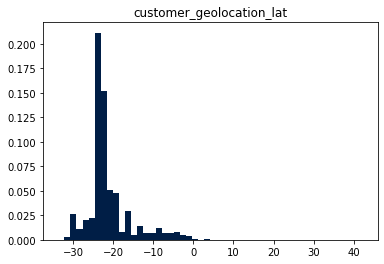

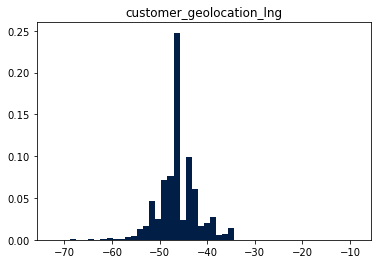

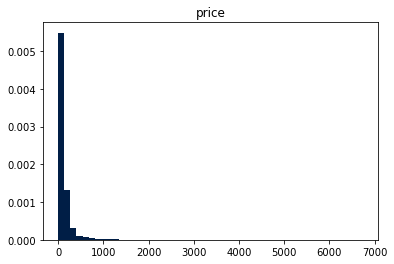

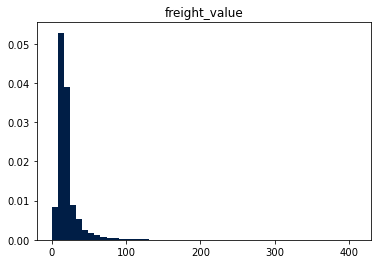

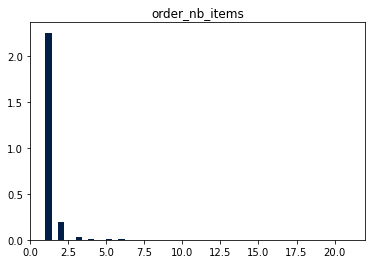

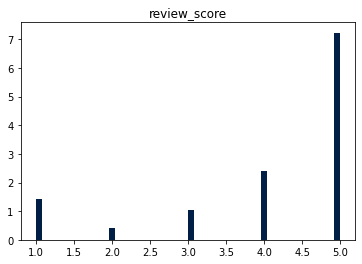

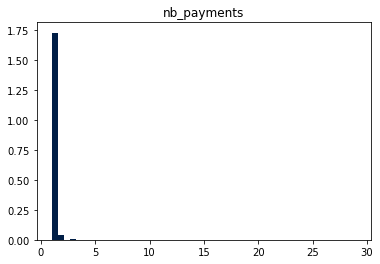

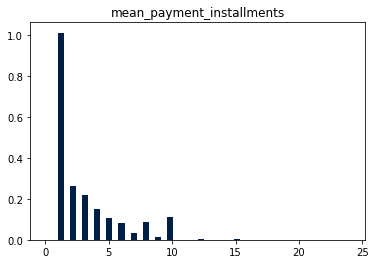

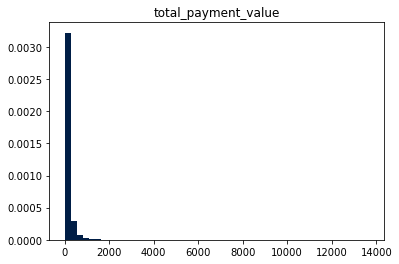

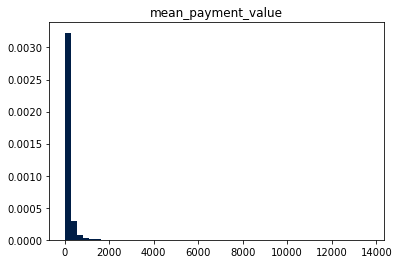

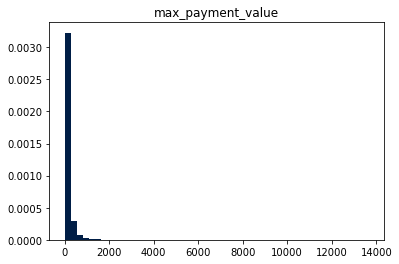

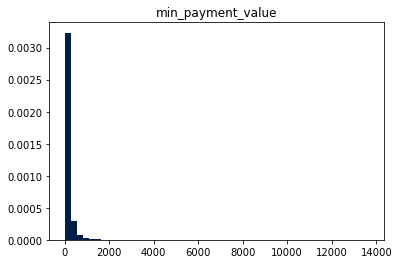

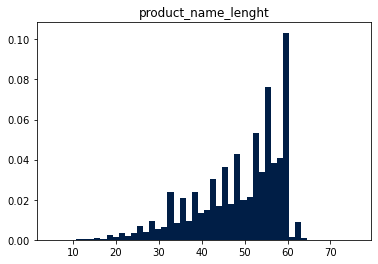

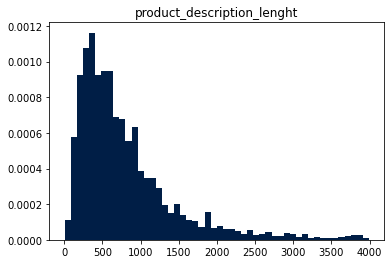

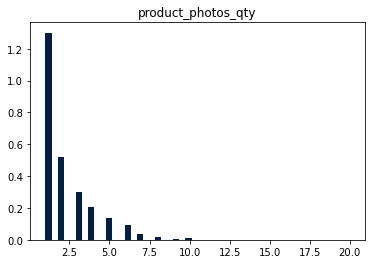

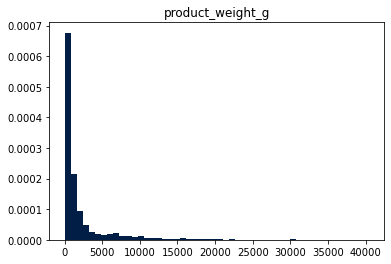

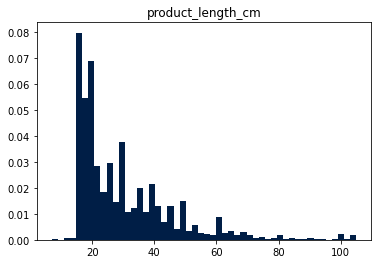

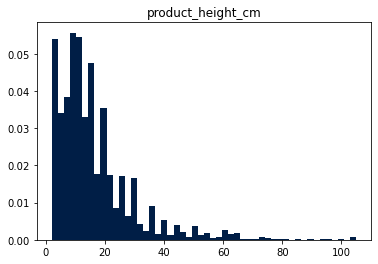

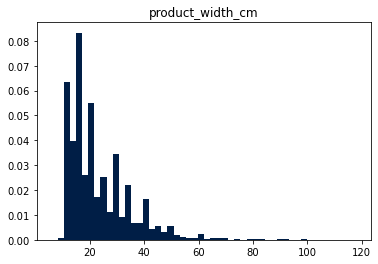

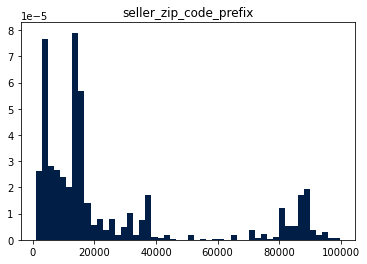

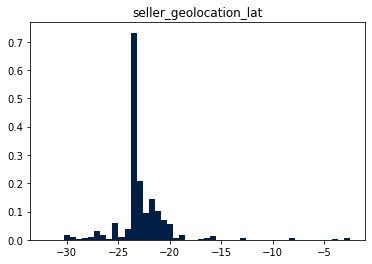

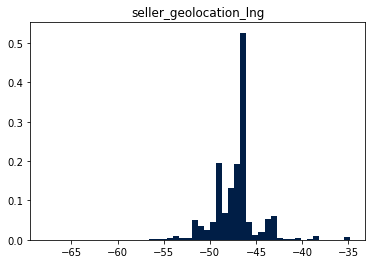

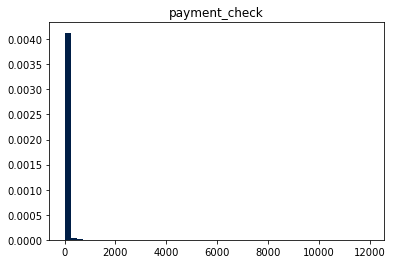

In [267]:
# Looking distributions

numerical_var = list(data.select_dtypes('float').columns)

for var in numerical_var:
    plt.figure()
    plt.hist(data[var], density=True, bins=50, color='#001E46', edgecolor='none')
    plt.title(var)
    plt.show()

### b. Dates

In [268]:
date_columns = list(data.select_dtypes('datetime64').columns)

In [269]:
for col in date_columns:
    print("Variable : {}".format(col))
    print("Min : {}".format(data[col].min()))
    print("Max : {}".format(data[col].max()))
    print("Mean : {}".format(data[col].mean()))
    print("Median : {}".format(data[col].median()))
    print("----------------------------------------------")

Variable : order_purchase_timestamp
Min : 2016-09-04 21:15:19
Max : 2018-10-17 17:30:18
Mean : 2017-12-31 08:43:12.776581120
Median : 2018-01-18 23:04:36
----------------------------------------------
Variable : order_delivered_carrier_date
Min : 2016-10-08 10:34:01
Max : 2018-09-11 19:48:28
Mean : 2018-01-04 21:49:48.138278400
Median : 2018-01-24 16:10:58
----------------------------------------------
Variable : order_delivered_customer_date
Min : 2016-10-11 13:46:32
Max : 2018-10-17 13:22:46
Mean : 2018-01-14 12:09:19.035542272
Median : 2018-02-02 19:28:10.500000
----------------------------------------------
Variable : order_estimated_delivery_date
Min : 2016-09-30 00:00:00
Max : 2018-11-12 00:00:00
Mean : 2018-01-24 03:08:37.730111232
Median : 2018-02-15 00:00:00
----------------------------------------------
Variable : shipping_limit_date
Min : 2016-09-19 00:15:34
Max : 2020-04-09 22:35:08
Mean : 2018-01-07 12:42:13.341130752
Median : 2018-01-26 13:52:23.500000
-------------------

In [270]:
# Dates should be between 2016 and 2018, for the variable shipping_limit_date we have values above 2018. Let's check it

data[data['shipping_limit_date'] > pd._libs.tslibs.timestamps.Timestamp('2018-12-31 23:59:59')]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,price,freight_value,order_nb_items,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,nb_payments,prefered_payment_type,mean_payment_installments,total_payment_value,mean_payment_value,max_payment_value,min_payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,payment_check
9742,22e922696a7d1ab9a19c6b702fedc387,b030929cf3b8c3370ea8c611f9ccb32e,71905,brasilia,DF,NaN,NaN,9c94a4ea2f7876660fa6f1b59b69c8e6,shipped,2017-03-14 19:23:22,2017-03-14 19:23:22,2017-03-16 14:31:15,NaT,2017-08-04,282b126b2354516c5f400154398f616d,7a241947449cc45dbfda4f9d0798d9d0,2020-02-03 20:23:22,75.99,14.70,1.0,89ca32f678121dc844cafc2b4b2c73a2,1.0,NaN,Não recebi até hoje o produto depois de mais d...,2017-05-17,2017-05-17 22:04:19,1.0,boleto,1.0,90.69,90.69,90.69,90.69,housewares,48.0,2396.0,2.0,3700.0,20.0,20.0,20.0,37590.0,jacutinga,MG,-22.288147,-46.611901,0.000000e+00
25211,b279a1d441c73c1974d7a63618855aa0,3977f83a14549e6265bcded84e92ee80,21210,rio de janeiro,RJ,-22.843731,-43.302427,13bdf405f961a6deec817d817f5c6624,canceled,2017-03-16 02:30:51,2017-03-16 02:30:51,NaT,NaT,2017-08-08,96ea060e41bdecc64e2de00b97068975,7a241947449cc45dbfda4f9d0798d9d0,2020-02-05 03:30:51,69.99,14.66,1.0,bacc1646cb86b3bb80da5e0bc79b6f69,1.0,NaN,NaN,2017-08-11,2017-08-11 16:52:36,1.0,boleto,1.0,84.65,84.65,84.65,84.65,housewares,45.0,1875.0,4.0,5150.0,70.0,9.0,40.0,37590.0,jacutinga,MG,-22.288147,-46.611901,1.421085e-14
41582,6357fffb5704244d552615bbfcea1442,44b6bbfea26596437062a38c8e6bcec1,15040,sao jose do rio preto,SP,-20.799615,-49.415358,c2bb89b5c1dd978d507284be78a04cb2,delivered,2017-05-23 22:28:36,2017-05-24 22:35:08,2017-05-29 02:03:28,2017-06-09 13:35:54,2017-10-11,87b92e06b320e803d334ac23966c80b1,7a241947449cc45dbfda4f9d0798d9d0,2020-04-09 22:35:08,99.99,61.44,2.0,6afeab17c60f9f9402bbf93abdce63e3,5.0,NaN,NaN,2017-06-10,2017-06-12 13:24:30,1.0,credit_card,15.0,322.86,322.86,322.86,322.86,housewares,58.0,914.0,5.0,15000.0,35.0,30.0,25.0,37590.0,jacutinga,MG,-22.288147,-46.611901,1.614300e+02


All values are from the same seller. The limit date is surprising but possible (the seller gave on purpose a date far to respect it ?)

### c. Categorical

In [271]:
data.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
customer_geolocation_lat                float64
customer_geolocation_lng                float64
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
order_nb_items                          float64
review_id                               

In [272]:
categ_var = ['customer_city', 'customer_state', 
             'order_status', 'prefered_payment_type', 
             'product_category_name', 'seller_city', 
             'seller_state']

In [273]:
for var in categ_var:
    print("Variable : {}".format(var))
    print(data[var].unique())
    print("----------------------------------------------")

Variable : customer_city
['franca' 'sao bernardo do campo' 'sao paulo' ... 'monte bonito'
 'sao rafael' 'eugenio de castro']
----------------------------------------------
Variable : customer_state
['SP' 'SC' 'MG' 'PR' 'RJ' 'RS' 'PA' 'GO' 'ES' 'BA' 'MA' 'MS' 'CE' 'DF'
 'RN' 'PE' 'MT' 'AM' 'AP' 'AL' 'RO' 'PB' 'TO' 'PI' 'AC' 'SE' 'RR']
----------------------------------------------
Variable : order_status
['delivered' 'canceled' 'invoiced' 'shipped' 'processing' 'unavailable'
 'approved' 'created']
----------------------------------------------
Variable : prefered_payment_type
['credit_card' 'debit_card' 'boleto' 'voucher' 'not_defined' nan]
----------------------------------------------
Variable : product_category_name
['office_furniture' 'housewares' 'home_confort' 'sports_leisure'
 'computers_accessories' nan 'toys' 'furniture_decor' 'auto'
 'air_conditioning' 'telephony' 'health_beauty' 'garden_tools' 'pet_shop'
 'bed_bath_table' 'baby' 'watches_gifts'
 'kitchen_dining_laundry_garden

In [274]:
# For city variables we can't check manually given the number of occurences
# but we can normalize text to ensure we don't have the same city written in different ways

print('Without normalization')
print('Occurences of customer_city : {}'.format(len(data['customer_city'].unique())))
print('Occurences of seller_city : {}'.format(len(data['seller_city'].unique())))
print('---------------------------------------------')
print('With normalization')
print('Occurences of customer_city : {}'.format(len(data['customer_city'].str.strip().str.lower().unique())))
print('Occurences of seller_city : {}'.format(len(data['seller_city'].str.strip().str.lower().unique())))

Without normalization
Occurences of customer_city : 4119
Occurences of seller_city : 612
---------------------------------------------
With normalization
Occurences of customer_city : 4119
Occurences of seller_city : 612


It doesn't change anything

For other variables, it seems consistent

## III - Missing values <a class="anchor" id="12-bullet"></a>

In [277]:
data[data.columns[data.isnull().any()]].isna().sum()

customer_geolocation_lat           278
customer_geolocation_lng           278
order_approved_at                  160
order_delivered_carrier_date      1783
order_delivered_customer_date     2965
product_id                         775
seller_id                          775
shipping_limit_date                775
price                              775
freight_value                      775
order_nb_items                     775
review_id                         1285
review_score                      1285
review_comment_title             87932
review_comment_message           58861
review_creation_date              1285
review_answer_timestamp           1285
nb_payments                          1
prefered_payment_type                1
mean_payment_installments            1
total_payment_value                  1
mean_payment_value                   1
max_payment_value                    1
min_payment_value                    1
product_category_name             2191
product_name_lenght      

In [305]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,price,freight_value,order_nb_items,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,nb_payments,prefered_payment_type,mean_payment_installments,total_payment_value,mean_payment_value,max_payment_value,min_payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,Not applicable,Not applicable,2017-05-26 00:00:00,2017-05-30 22:34:40,1.0,credit_card,2.0,146.87,146.87,146.87,146.87,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,-23.486111,-46.366721
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1.0,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,Not applicable,Not applicable,2018-01-30 00:00:00,2018-02-10 22:43:29,1.0,credit_card,8.0,335.48,335.48,335.48,335.48,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC,-26.912574,-48.673980
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1.0,5ad6695d76ee186dc473c42706984d87,5.0,Not applicable,Not applicable,2018-06-15 00:00:00,2018-06-15 12:10:59,1.0,credit_card,7.0,157.73,157.73,157.73,157.73,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,-23.486111,-46.366721
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1.0,059a801bb31f6aab2266e672cab87bc5,5.0,Not applicable,Not applicable,2018-03-29 00:00:00,2018-04-02 18:36:47,1.0,credit_card,1.0,173.30,173.30,173.30,173.30,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,-23.486111,-46.366721
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1.0,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1.0,credit_card,8.0,252.25,252.25,252.25,252.25,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP,-21.757321,-48.829744


We can fix :
- location looking to correspondings zip codes manually
- for reviews, creation of 'not applicable'
- for orders dates, creation of 'not applicable'
- payment, only one missing value

We probably can't fix (except maybe later with imputation) :
- missing times informations
- missing products informations
- other sellers missing informations

### a. Reviews

In [278]:
# When we have a NaN value for reviews variables, we can assume it means the customer didn't make a review. 
# We will replace NaN by 'Not applicable'

review_var = ['review_id', 'review_score', 
              'review_comment_title', 'review_comment_message', 
              'review_creation_date', 'review_answer_timestamp']

for var in review_var:
    data.loc[data[var].isna(), var] = 'Not applicable'

In [279]:
data[data.columns[data.isnull().any()]].isna().sum()

customer_geolocation_lat          278
customer_geolocation_lng          278
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
order_nb_items                    775
nb_payments                         1
prefered_payment_type               1
mean_payment_installments           1
total_payment_value                 1
mean_payment_value                  1
max_payment_value                   1
min_payment_value                   1
product_category_name            2191
product_name_lenght              2191
product_description_lenght       2191
product_photos_qty               2191
product_weight_g                  791
product_length_cm                 791
product_height_cm                 791
product_width_cm                  791
seller_zip_c

### b. Payment

In [280]:
# Looking missing value
data[data['nb_payments'].isna()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,price,freight_value,order_nb_items,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,nb_payments,prefered_payment_type,mean_payment_installments,total_payment_value,mean_payment_value,max_payment_value,min_payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
21125,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,-20.585751,-47.863693,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,3.0,6916ca4502d6d3bfd39818759d55d536,1.0,Not applicable,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,health_beauty,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,81810.0,curitiba,PR,-25.507014,-49.275963


In [281]:
# Only one missing values, we can drop this row
data.dropna(subset=['nb_payments'], inplace=True)

In [282]:
data[data.columns[data.isnull().any()]].isna().sum()

customer_geolocation_lat          278
customer_geolocation_lng          278
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
order_nb_items                    775
product_category_name            2191
product_name_lenght              2191
product_description_lenght       2191
product_photos_qty               2191
product_weight_g                  791
product_length_cm                 791
product_height_cm                 791
product_width_cm                  791
seller_zip_code_prefix            775
seller_city                       775
seller_state                      775
seller_geolocation_lat            993
seller_geolocation_lng            993
dtype: int64

### c. Orders

We have missing values for order_delivered_customer_date and order_delivered_carrier_date. This could be because the order hasn't been delivered, let's check

In [283]:
# We create 2 dfs with missing values for simplification of next steps
missing_order_delivered_carrier_date = data[data['order_delivered_carrier_date'].isna()]
missing_order_delivered_customer_date = data[data['order_delivered_customer_date'].isna()]

# Looking status for missing values
print(missing_order_delivered_carrier_date['order_status'].unique())
print('')
print(missing_order_delivered_customer_date['order_status'].unique())

['canceled' 'invoiced' 'processing' 'unavailable' 'approved' 'created'
 'delivered']

['canceled' 'invoiced' 'shipped' 'processing' 'unavailable' 'approved'
 'delivered' 'created']


In [284]:
# For order_delivered_carrier_date we can assume it makes sense that we have NaN values if the order isn't delivered
# Let's check if we have delivered orders without values

missing_order_delivered_carrier_date[missing_order_delivered_carrier_date['order_status'] == 'delivered']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,price,freight_value,order_nb_items,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,nb_payments,prefered_payment_type,mean_payment_installments,total_payment_value,mean_payment_value,max_payment_value,min_payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
86959,afeb16c7f46396c0ed54acb45ccaaa40,a2ac81ecc3704410ae240e74d4f0af40,13334,indaiatuba,SP,-23.082208,-47.203433,2aa91108853cecb43c84a5dc5b277475,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14,44c2baf621113fa7ac95fa06b4afbc68,3f2af2670e104d1bcb54022274daeac5,2017-10-18 10:07:16,179.0,14.98,1.0,e945d1831a3d98008913fc31dcbb804d,5.0,Not applicable,Not applicable,2017-10-17 00:00:00,2017-10-17 10:56:02,1.0,credit_card,1.0,193.98,193.98,193.98,193.98,furniture_decor,54.0,984.0,2.0,7000.0,16.0,50.0,55.0,87240.0,terra boa,PR,-23.771858,-52.448328
97677,e08caf668d499a6d643dafd7c5cc498a,d77cf4be2654aa70ef150f8bfec076a6,91330,porto alegre,RS,-30.033566,-51.162560,2d858f451373b04fb5c984a1cc2defaf,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23,30b5b5635a79548a48d04162d971848f,f9bbdd976532d50b7816d285a22bd01e,2017-06-04 23:30:16,179.0,15.00,1.0,4e755f114e50d33b9ac6a56e0d7d3ea9,5.0,Not applicable,Not applicable,2017-06-25 00:00:00,2017-06-27 01:49:04,1.0,credit_card,4.0,194.00,194.00,194.00,194.00,sports_leisure,43.0,1873.0,2.0,900.0,26.0,26.0,26.0,5319.0,sao paulo,SP,-23.541812,-46.730687


In [285]:
# We have only 2 rows, we will delete them

index_list = missing_order_delivered_carrier_date[missing_order_delivered_carrier_date['order_status'] == 'delivered'].index

data.drop(index_list, inplace=True)

In [286]:
# For other values, we will create 'Not applicable'

data.loc[data['order_delivered_carrier_date'].isna(), 'order_delivered_carrier_date'] = 'Not applicable'

In [287]:
# Same check for order_delivered_customer_date

missing_order_delivered_customer_date[missing_order_delivered_customer_date['order_status'] == 'delivered']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,price,freight_value,order_nb_items,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,nb_payments,prefered_payment_type,mean_payment_installments,total_payment_value,mean_payment_value,max_payment_value,min_payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
9034,5e89028e024b381dc84a13a3570decb4,2f17c5b324ad603491521b279a9ff4de,18255,quadra,SP,-23.293915,-48.057538,f5dd62b788049ad9fc0526e3ad11a097,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16,2167c8f6252667c0eb9edd51520706a1,0bb738e4d789e63e2267697c42d35a2d,2018-06-26 07:19:05,329.00,25.24,1.0,c0dd6bec0375c376f044af102118526f,5.0,Entrega super rápida.,"Produto novo, muito bom.",2018-06-29 00:00:00,2018-06-29 16:26:37,1.0,debit_card,1.0,354.24,354.24,354.24,354.24,industry_commerce_and_business,48.0,1581.0,1.0,7750.0,36.0,51.0,18.0,18130.0,sao roque,SP,-23.531424,-47.134428
12030,28c37425f1127d887d7337f284080a0f,175378436e2978be55b8f4316bce4811,9431,ribeirao pires,SP,-23.691430,-46.382238,20edc82cf5400ce95e1afacc25798b31,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19,55bfa0307d7a46bed72c492259921231,343e716476e3748b069f980efbaa294e,2018-07-03 16:29:30,45.90,9.07,1.0,d055795a562efffefe47ef81e5435322,5.0,Muito bom,Adorei,2018-07-06 00:00:00,2018-07-06 20:30:17,1.0,credit_card,1.0,54.97,54.97,54.97,54.97,books_general_interest,43.0,838.0,1.0,550.0,26.0,7.0,36.0,13033.0,campinas,SP,-22.904937,-47.097085
13357,29f0540231702fda0cfdee0a310f11aa,1bd06a0c0df8b23dacfd3725d2dc0bb9,12445,pindamonhangaba,SP,-22.888249,-45.376194,2ebdfc4f15f23b91474edf87475f108e,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30,e7d5464b94c9a5963f7c686fc80145ad,58f1a6197ed863543e0136bdedb3fce2,2018-07-05 17:15:12,139.00,19.07,1.0,25e11638a3d01a87e8e62338a39eee28,5.0,Not applicable,Not applicable,2018-07-11 00:00:00,2018-07-11 19:27:46,1.0,credit_card,3.0,158.07,158.07,158.07,158.07,watches_gifts,42.0,938.0,5.0,275.0,16.0,14.0,14.0,36407.0,conselheiro lafaiete,MG,-20.659212,-43.806927
51668,ec05a6d8558c6455f0cbbd8a420ad34f,13467e882eb3a701826435ee4424f2bd,18520,cerquilho,SP,-23.166262,-47.746689,2d1e2d5bf4dc7227b3bfebb81328c15f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18,a50acd33ba7a8da8e9db65094fa990a4,8581055ce74af1daba164fdbd55a40de,2017-12-04 17:56:40,117.30,17.53,1.0,f48c6c944a5d52dcca8ac5c4ec417cf2,5.0,Not applicable,Chegou rápido tudo ok,2017-12-19 00:00:00,2017-12-19 04:15:39,1.0,credit_card,3.0,134.83,134.83,134.83,134.83,auto,53.0,555.0,1.0,4105.0,67.0,10.0,67.0,7112.0,guarulhos,SP,-23.468704,-46.516142
85377,dd1b84a7286eb4524d52af4256c0ba24,cce5e8188bf42ffb3bb5b18ff58f5965,7261,guarulhos,SP,-23.446492,-46.408626,ab7c89dc1bf4a1ead9d6ec1ec8968a84,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26,a2a7efc985315e86d4f0f705701b342b,ed4acab38528488b65a9a9c603ff024a,2018-06-18 12:30:35,110.99,9.13,1.0,0d4c56af896dd6eb9de8edbaa1902d22,1.0,Péssimo,Comprei um produto de uma marca e recebi outro...,2018-06-16 00:00:00,2018-06-16 13:55:00,1.0,credit_card,5.0,120.12,120.12,120.12,120.12,computers_accessories,45.0,837.0,1.0,1133.0,16.0,15.0,20.0,8260.0,sao paulo,SP,-23.565855,-46.434938
87172,cfda40ca8dd0a5d486a9635b611b398a,3bc508d482a402715be4d5cf4020cc81,13170,sumare,SP,-22.822137,-47.270335,e69f75a717d64fc5ecdfae42b2e8e086,delivere

In [288]:
# Delete rows and replace others by 'Not applicable'

index_list = list(missing_order_delivered_customer_date[missing_order_delivered_customer_date['order_status'] == 'delivered'].index)
index_list.remove(97677) # Already deleted above

data.drop(index_list, inplace=True)

data.loc[data['order_delivered_customer_date'].isna(), 'order_delivered_customer_date'] = 'Not applicable'

### --> Voir si possible de remplacer les dates par l'estimé mais ça ne semble pas fonctionner avec les NaT (ça serait plus clean)

In [289]:
data[data.columns[data.isnull().any()]].isna().sum()

customer_geolocation_lat       278
customer_geolocation_lng       278
order_approved_at              160
product_id                     775
seller_id                      775
shipping_limit_date            775
price                          775
freight_value                  775
order_nb_items                 775
product_category_name         2191
product_name_lenght           2191
product_description_lenght    2191
product_photos_qty            2191
product_weight_g               791
product_length_cm              791
product_height_cm              791
product_width_cm               791
seller_zip_code_prefix         775
seller_city                    775
seller_state                   775
seller_geolocation_lat         993
seller_geolocation_lng         993
dtype: int64

Remaining NaN are actual missing values so we can't manually treat them, we will impute or delete them later for our machine learning algorithm

# Notes

The objective would be to extract informations for unique customers (with customer_unique_id) with this dataframe, a lot a feature engineering will be necessary. Some ideas for now :
- Number of orders
- Time for approval of order (diff with purchase time)
- Time for delivery (carrier / customer) of order (diff with purchase time)
- Time for estimated delivery (diff with purchase time)
- Difference estimated / real time of delivery
- Average number of items per order
- Number of orders with the same seller
- Orders with shipping limit overdue
- Average price of orders
- Average freight_value of orders
- % of reviews (creation of var review if review_score not NaN / number of orders)
- Average review score given
- % of comments on review
- Average number of payment_sequential
- Average time of review (diff with delivery time)
- Favorite payment_type
- Average number of payment_installments
- Average payment_value (same as price + freight value ?)
- Favorite product_category_name

Interest of dimensions of objects ?
Interest of location of seller ?

Should look too if a customer changed location, creation of a var moving ?

Notes, explanation of each dataframe :
- customers : for each customer_id, tells
    - customer_unique_id --> IMPORTANT : a same customer has one and only one customer_unique_id, but for each order has a different customer_id, so only customer_unique_id allows us to spot if a same customer has made severel orders
    - customers location informations 
- orders : for each order_id, tells
    - customer_id related to this order
    - shipping information and status of the order
- order_items : for each order_id, tells
    - product_id --> IMPORTANT : each order_id can has only and only one product_id, so we can assume that the dataset has been built with 2 differents order_id if the customer bought different products in the same order
    - seller_id
    - nb items (of the same product) and prices informations
- order_reviews : for each order_id, tells
    - review_id --> IMPORTANT : one review_id can by related to multiples order_id (but with the same customer_unique_id), this reinforce our previous assumption that if one order has different products, we will have different order_id related to each, but only one review_id for the full order
    - reviews informations (note, comments...)
- order_payments : gives payment information for each order_id
- products : gives characteristics of a product for each product_id
- sellers : gives location informations for each seller_id
- product_category_name_translation : translation of portuguese names in english
- geolocation : gives the coordinates related to the differents zip codes

# TESTS

In [ ]:
customers
geolocation
order_items
order_payments
order_reviews
orders
products
sellers
product_category_name_translation

In [317]:
data.loc[(data['product_id'] == '99a4788cb24856965c36a24e339b6058') & (data['order_nb_items'] > 1)]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,price,freight_value,order_nb_items,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,nb_payments,prefered_payment_type,mean_payment_installments,total_payment_value,mean_payment_value,max_payment_value,min_payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
7854,72aa84f482e9441a8c1599c07d734e45,6be28ae15cd1e7b3f3f36ac483512822,95041,caxias do sul,RS,-29.151228,-51.181578,ff00a56fe9475a175cd651d77c707a09,delivered,2017-11-24 00:08:10,2017-11-24 01:10:14,2017-11-29 17:48:57,2017-12-18 13:14:05,2017-12-26,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2017-11-30 01:10:14,89.9,4.63,3.0,93f23682d0cc200fcbe5aced6c8305ef,5.0,Not applicable,Not applicable,2017-12-09 00:00:00,2017-12-10 02:14:08,1.0,credit_card,8.0,352.27,352.27,352.27,352.27,bed_bath_table,54.0,245.0,1.0,1383.0,50.0,10.0,40.0,14940.0,ibitinga,SP,-21.757321,-48.829744
9382,f0a44676cb97b8d7b986aaea97a53897,97c449a46729b9ae673219997156645b,28970,araruama,RJ,-22.869657,-42.321415,42ff676d61e2f5f1b7dfc8404dc3160d,delivered,2017-12-06 15:27:03,2017-12-09 17:30:34,2017-12-11 23:49:08,2017-12-29 14:32:36,2018-01-04,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2017-12-14 17:30:34,89.9,21.12,2.0,77ec711c813414ccfe9f679c8dd21da8,5.0,Not applicable,Not applicable,2017-12-30 00:00:00,2018-01-01 20:08:48,1.0,credit_card,1.0,222.04,222.04,222.04,222.04,bed_bath_table,54.0,245.0,1.0,1383.0,50.0,10.0,40.0,14940.0,ibitinga,SP,-21.757321,-48.829744
10623,7071ae1d5f4717f7b02d13806ad39c11,fef62bb69c27d647eb69eaac077cf3d7,3729,sao paulo,SP,-23.500968,-46.505022,45026cb636ca6934b7fa98e965f53d96,delivered,2018-05-21 14:51:10,2018-05-23 02:55:02,2018-05-23 13:45:00,2018-06-04 14:28:48,2018-06-06,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-05-28 02:55:02,86.9,20.50,2.0,04e21a8ffc2bac41be9a98102cd56687,5.0,Not applicable,Simplesmente amei!!!,2018-06-05 00:00:00,2018-06-10 11:02:30,1.0,boleto,1.0,237.80,237.80,237.80,237.80,bed_bath_table,54.0,245.0,1.0,1383.0,50.0,10.0,40.0,14940.0,ibitinga,SP,-21.757321,-48.829744
16455,adb8a86c72b4a2451e52a6c197a24c08,7647c15a4f2e66304c91fcf86573a2a3,29060,vitoria,ES,-20.284593,-40.295405,8705f63a4f33f2570126a9f57336b1e4,delivered,2017-11-29 15:41:09,2017-11-29 16:31:02,2017-12-05 11:29:04,2017-12-21 19:15:24,2017-12-21,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2017-12-05 16:00:11,89.9,19.50,2.0,b0476992b0f60fb1409c767b96c235de,5.0,Not applicable,Not applicable,2017-12-22 00:00:00,2017-12-26 00:53:15,1.0,credit_card,1.0,218.80,218.80,218.80,218.80,bed_bath_table,54.0,245.0,1.0,1383.0,50.0,10.0,40.0,14940.0,ibitinga,SP,-21.757321,-48.829744
21321,58ccace0f4b7abcab017ff6f1d534d7b,3ad84abcfa9a58f9ede403889421500b,4814,sao paulo,SP,-23.725480,-46.678527,935be32550a2544a4fba77fca77c8dd2,delivered,2017-07-21 20:37:36,2017-07-21 20:50:19,2017-07-24 20:43:58,2017-07-31 13:32:52,2017-08-10,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2017-07-27 20:50:19,89.9,12.13,2.0,9975fb43c93a6f7fedc9a9ab8fabd950,3.0,Not applicable,Not applicable,2017-08-01 00:00:00,2017-11-29 16:16:52,1.0,credit_card,4.0,204.06,204.06,204.06,204.06,bed_bath_table,54.0,245.0,1.0,1383.0,50.0,10.0,40.0,14940.0,ibitinga,SP,-21.757321,-48.829744
21746,058abae409b8feebc30f284da465a1ff,61d6e3e6f112347f587c586ae6819af0,98802,santo angelo,RS,-28.290148,-54.270009,967ed7a1aa1d6b190c903a3daa815f02,deli